In [2]:
import pandas as pd 
import geopandas as gpd
import matplotlib.pyplot as plt
import libpysal as ps
import numpy as np
import geopandas
import shapely.wkt

from datetime import datetime
from shapely.geometry import Point, Polygon


In [ ]:
typering["begindatum"] =  pd.to_datetime(typering['begindatum'], format='%Y%m%d%H%M%S%f', errors='coerce')

# Panden

In [4]:
def pandCleaner(data):
    print(data.shape)
    # only select buildings that are in use
    data = data[data["pandstatus"] == 'Pand in gebruik']
    print(data.shape)
    # delete buildings without an ID
    data = data[data["identificatie"].notna()]
    print(data.shape)
    # set dates to datetime
    data["begindatumTijdvakGeldigheid"] =  pd.to_datetime(data['begindatumTijdvakGeldigheid'], format='%Y%m%d%H%M%S%f', errors='coerce')
    data["einddatumTijdvakGeldigheid"] =  pd.to_datetime(data['einddatumTijdvakGeldigheid'], format='%Y%m%d%H%M%S%f', errors='coerce')
    data["documentdatum"] =  pd.to_datetime(data['einddatumTijdvakGeldigheid'], format='%Y%m%d%H%M%S%f', errors='coerce')
    print(data.shape)
    return data

In [5]:
def pand_polygoner(inp):
    """
    Use as:
    can be used for pandas.apply function
    input: column containting string of polygons with x y z x y z etc
    output: polygons
    """
    total = []
    poly = []
    for i,n in enumerate(inp.split()):
        i += 1
        poly.append(float(n))
        
        if i % 3 == 0:
            total.append(poly)
            poly = []
            
    return Polygon(total)

In [6]:
pand = pd.read_csv("PAND.csv", sep = ";", encoding = "utf-8", na_values = "NaN", 
                   parse_dates = ["begindatumTijdvakGeldigheid", "einddatumTijdvakGeldigheid"], on_bad_lines = "warn")
pand.iloc[10]

b'Skipping line 533308: expected 11 fields, saw 12\nSkipping line 542302: expected 11 fields, saw 12\nSkipping line 546913: expected 11 fields, saw 12\n'
b'Skipping line 2402168: expected 11 fields, saw 12\n'
b'Skipping line 6122630: expected 11 fields, saw 12\n'
b'Skipping line 6511403: expected 11 fields, saw 12\nSkipping line 6511405: expected 11 fields, saw 12\nSkipping line 6513243: expected 11 fields, saw 12\nSkipping line 6526419: expected 11 fields, saw 12\nSkipping line 6532284: expected 11 fields, saw 12\nSkipping line 6539521: expected 11 fields, saw 12\nSkipping line 6544341: expected 11 fields, saw 12\nSkipping line 6547862: expected 11 fields, saw 12\nSkipping line 6549397: expected 11 fields, saw 12\nSkipping line 6550250: expected 11 fields, saw 12\nSkipping line 6550252: expected 11 fields, saw 12\n'
b'Skipping line 6553782: expected 11 fields, saw 12\nSkipping line 6554368: expected 11 fields, saw 12\nSkipping line 6554878: expected 11 fields, saw 12\nSkipping line 65

bouwjaar                                                                  1970.0
pandstatus                                                       Pand in gebruik
begindatumTijdvakGeldigheid                                     2010072000000000
einddatumTijdvakGeldigheid                                                   NaN
inOnderzoek                                                                    N
documentdatum                                                         20100720.0
documentnummer                                                 FB 2010/PANDEN001
identificatie                                                    3100000117495.0
aanduidingRecordInactief                                                       N
officieel                                                                      N
posList                        252834.99 593531.368 0.0 252834.924 593532.877...
Name: 10, dtype: object

In [7]:
pand = pandCleaner(pand)
pand["posList"] = pand.posList.apply(pand_polygoner)

(19112112, 11)
(15353723, 11)
(15346856, 11)
(15346856, 11)


NameError: name 'Polygon' is not defined

In [14]:
pand.einddatumTijdvakGeldigheid.values.sort()

# VBO

In [1]:

vbo = pd.read_csv("VBO.csv", sep = ";", encoding = "utf-8", na_values = "NaN", 
                  parse_dates = ["begindatumTijdvakGeldigheid", "einddatumTijdvakGeldigheid"], on_bad_lines = "warn")
vbo.iloc[10]

NameError: name 'pd' is not defined

In [29]:
from shapely.geometry import asPoint
def VBOCleaner(data):
    print(data.shape)
    
    # only keep objects with id
    data = data[data["identificatie"].notna()]
    print(data.shape)
    
    # only keep objects which are currently in use # CHECK of dit de juiste zijn
    data = data[data.verblijfsobjectStatus.isin(["Verblijfsobject gevormd", 
                                                 "Verblijfsobject in gebruik",
                                                 "Verblijfsobject in gebruik (niet ingemeten)"])]
    data = data[data.pos.notna()]
    print(data.shape)
    
    data["begindatumTijdvakGeldigheid"] =  pd.to_datetime(data['begindatumTijdvakGeldigheid'], format='%Y%m%d%H%M%S%f', errors='coerce')
    data["einddatumTijdvakGeldigheid"] =  pd.to_datetime(data['einddatumTijdvakGeldigheid'], format='%Y%m%d%H%M%S%f', errors='coerce')
    
    def toPoint(pos):
        return asPoint([float(i) for i in pos.split()[:2]])
    data["pos"] = data.pos.apply(toPoint)
    
    return data

In [30]:
vbo = VBOCleaner(vbo)
vbo.iloc[10]

(19501545, 7)
(18918593, 7)
(18386142, 7)


gebruiksdoelVerblijfsobject                                    woonfunctie
oppervlakteVerblijfsobject                                           163.0
verblijfsobjectStatus          Verblijfsobject in gebruik (niet ingemeten)
begindatumTijdvakGeldigheid                            2021-06-01 00:00:01
einddatumTijdvakGeldigheid                                             NaT
identificatie                                              3100000121174.0
pos                                                  POINT (252909 593675)
Name: 13, dtype: object

# CBS

In [130]:
cbs = gpd.read_file("../Data/cbs/2015/CBS_VK100_2015_v3.shp")
cbs = cbs[["AFS_HAPRAK", "AFS_ZIEK_E", "AFS_SUPERM", "AV1_RESTAU",  "AFS_ONDBAS", "AFS_ONDVRT", "AFS_OPRIT", "AFS_TREINS", "UITKMINAOW", "M_INKHH", "P_NW_MIG_A", "P_WE_MIG_A", "c28992r100"]]

DriverError: ../Data/cbs/2015/CBS_VK100_2015_v3.shp: No such file or directory

In [29]:
grid2015 = pd.read_csv("grid2015.csv")
grid2015 = gpd.GeoDataFrame(grid2015)

In [56]:
grid2015 = grid2015.merge(cbs, how = "left", right_on = "c28992r100", left_on = "C28992R100")

In [64]:
grid2015.geometry = grid2015.geometry.apply(shapely.wkt.loads)

In [75]:
grid2015.describe()

,bijeenkomstfunctie,celfunctie,gezondheidszorgfunctie,industriefunctie,kantoorfunctie,logiesfunctie,onderwijsfunctie,sportfunctie,winkelfunctie,woonfunctie,...,AFS_SUPERM,AV1_RESTAU,AFS_ONDBAS,AFS_ONDVRT,AFS_OPRIT,AFS_TREINS,UITKMINAOW,P_NW_MIG_A,P_WE_MIG_A,b
count,7506.000000,7506.000000,7506.000000,7506.000000,7506.000000,7506.000000,7506.000000,7506.000000,7506.000000,7506.000000,...,5300.000000,5300.000000,5300.000000,5300.000000,5300.000000,5300.000000,5300.000000,5300.000000,5300.000000,14715.000000
mean,0.149347,0.000266,0.093925,0.308820,0.425127,0.028511,0.037037,0.024247,0.353983,17.474953,...,-659.530340,-654.316755,-659.686453,-658.580057,-657.889358,-656.264962,-63107.279245,-50514.963396,-43442.356792,0.423649
std,0.641200,0.016322,1.096951,0.958858,1.883001,0.413287,0.215861,0.166312,1.555308,20.478935,...,8100.072461,8100.505836,8100.059719,8100.150008,8100.206299,8100.338927,48258.189538,50012.376541,49580.721539,0.494153
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-99997.000000,-99997.000000,-99997.000000,-99997.000000,-99997.000000,-99997.000000,-99997.000000,-99997.000000,-99997.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,...,0.400000,0.800000,0.400000,0.900000,1.800000,2.575000,-99997.000000,-99997.000000,-99997.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,11.000000,...,0.700000,2.000000,0.600000,1.400000,2.400000,4.000000,-99997.000000,-99997.000000,10.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,28.750000,...,1.000000,6.400000,0.800000,2.400000,3.200000,5.500000,5.000000,20.000000,20.000000,1.000000
max,18.000000,1.000000,58.000000,26.000000,77.000000,16.000000,5.000000,3.000000,50.000000,278.000000,...,4.400000,102.600000,3.000000,7.400000,6.000000,10.200000,110.000000,80.000000,80.000000,1.000000


In [ ]:
["AFS_HAPRAK", "AFS_ZIEK_E", "AFS_SUPERM", "AV1_RESTAU",  "AFS_ONDBAS", "AFS_ONDVRT", "AFS_OPRIT", "AFS_TREINS", "UITKMINAOW", "P_LINK_HH", "P_HINK_HH", "M_INKHH", "P_NW_MIG_A", "P_WE_MIG_A"]

In [82]:
grid2015.iloc[0]

C28992R100                                                           E1528N3897
geometry                      POLYGON ((152800 389800, 152900 389800, 152900...
bijeenkomstfunctie                                                          NaN
celfunctie                                                                  NaN
gezondheidszorgfunctie                                                      NaN
industriefunctie                                                            NaN
kantoorfunctie                                                              NaN
logiesfunctie                                                               NaN
onderwijsfunctie                                                            NaN
sportfunctie                                                                NaN
winkelfunctie                                                               NaN
woonfunctie                                                                 NaN
oppervlakteVerblijfsobject              

In [99]:
grid2015 = grid2015.replace(-99997, "NaN")

In [90]:
grid2015[grid2015.AFS_ONDVRT == -99997]

,C28992R100,geometry,bijeenkomstfunctie,celfunctie,gezondheidszorgfunctie,industriefunctie,kantoorfunctie,logiesfunctie,onderwijsfunctie,sportfunctie,...,AFS_ONDBAS,AFS_ONDVRT,AFS_OPRIT,AFS_TREINS,UITKMINAOW,M_INKHH,P_NW_MIG_A,P_WE_MIG_A,c28992r100,b
747,E1600N3892,"POLYGON ((160000.000 389300.000, 160100.000 38...",0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,...,-99997.0,-99997.0,-99997.0,-99997.0,-99997.0,onclassificeerbaar,-99997.0,-99997.0,E1600N3892,0
2621,E1584N3878,"POLYGON ((158400.000 387900.000, 158500.000 38...",0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,...,-99997.0,-99997.0,-99997.0,-99997.0,-99997.0,onclassificeerbaar,-99997.0,-99997.0,E1584N3878,1
4405,E1613N3865,"POLYGON ((161300.000 386600.000, 161400.000 38...",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-99997.0,-99997.0,-99997.0,-99997.0,-99997.0,onclassificeerbaar,-99997.0,-99997.0,E1613N3865,1
4552,E1625N3864,"POLYGON ((162500.000 386500.000, 162600.000 38...",0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,-99997.0,-99997.0,-99997.0,-99997.0,-99997.0,onclassificeerbaar,-99997.0,-99997.0,E1625N3864,1
5344,E1607N3858,"POLYGON ((160700.000 385900.000, 160800.000 38...",1.0,0.0,0.0,1.0,4.0,0.0,0.0,0.0,...,-99997.0,-99997.0,-99997.0,-99997.0,-99997.0,onclassificeerbaar,-99997.0,-99997.0,E1607N3858,1
5631,E1624N3856,"POLYGON ((162400.000 385700.000, 162500.000 38...",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-99997.0,-99997.0,-99997.0,-99997.0,-99997.0,onclassificeerbaar,-99997.0,-99997.0,E1624N3856,1
6159,E1612N3852,"POLYGON ((161200.000 385300.000, 161300.000 38...",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-99997.0,-99997.0,-99997.0,-99997.0,-99997.0,onclassificeerbaar,-99997.0,-99997.0,E1612N3852,1
6276,E1594N3851,"POLYGON ((159400.000 385200.000, 159500.000 38...",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-99997.0,-99997.0,-99997.0,-99997.0,-99997.0,onclassificeerbaar,-99997.0,-99997.0,E1594N3851,1
7358,E1596N3843,"POLYGON ((159600.000 384400.000, 159700.000 38...",3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-99997.0,-99997.0,-99997.0,-99997.0,-99997.0,onclassificeerbaar,-99997.0,-99997.0,E1596N3843,1
7403,E1641N3843,"POLYGON ((164100.000 384400.000, 164200.000 38...",1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-99997.0,-99997.0,-99997.0,-99997.0,-99997.0,onclassificeerbaar,-99997.0,-99997.0,E1641N3843,1


In [104]:
grid2015.isnull().sum()/len(grid2015)*100                                                  

C28992R100                     0.000000
geometry                       0.000000
bijeenkomstfunctie            48.990826
celfunctie                    48.990826
gezondheidszorgfunctie        48.990826
industriefunctie              48.990826
kantoorfunctie                48.990826
logiesfunctie                 48.990826
onderwijsfunctie              48.990826
sportfunctie                  48.990826
winkelfunctie                 48.990826
woonfunctie                   48.990826
oppervlakteVerblijfsobject    53.346925
y                             48.990826
AFS_HAPRAK                    64.220183
AFS_ZIEK_E                    64.220183
AFS_SUPERM                    64.220183
AV1_RESTAU                    64.220183
AFS_ONDBAS                    64.220183
AFS_ONDVRT                    64.220183
AFS_OPRIT                     64.220183
AFS_TREINS                    64.220183
UITKMINAOW                    86.714237
M_INKHH                       63.982331
P_NW_MIG_A                    82.181448


In [141]:
bebouwd = grid2015[grid2015.b.astype(bool)]

In [109]:
bebouwd.isnull().sum()/len(bebouwd)*100  

C28992R100                     0.000000
geometry                       0.000000
bijeenkomstfunctie             0.000000
celfunctie                     0.000000
gezondheidszorgfunctie         0.000000
industriefunctie               0.000000
kantoorfunctie                 0.000000
logiesfunctie                  0.000000
onderwijsfunctie               0.000000
sportfunctie                   0.000000
winkelfunctie                  0.000000
woonfunctie                    0.000000
oppervlakteVerblijfsobject     0.000000
y                              0.000000
AFS_HAPRAK                    19.377607
AFS_ZIEK_E                    19.377607
AFS_SUPERM                    19.377607
AV1_RESTAU                    19.377607
AFS_ONDBAS                    19.377607
AFS_ONDVRT                    19.377607
AFS_OPRIT                     19.377607
AFS_TREINS                    19.377607
UITKMINAOW                    68.864293
M_INKHH                       18.880334
P_NW_MIG_A                    58.213025


In [110]:
from sklearn.ensemble import RandomForestClassifier

In [127]:
bebouwd = bebouwd[['bijeenkomstfunctie', 'celfunctie',
       'gezondheidszorgfunctie', 'industriefunctie', 'kantoorfunctie',
       'logiesfunctie', 'onderwijsfunctie', 'sportfunctie', 'winkelfunctie',
       'woonfunctie', 'oppervlakteVerblijfsobject', 'y', 'AFS_HAPRAK',
       'AFS_ZIEK_E', 'AFS_SUPERM', 'AV1_RESTAU', 'AFS_ONDBAS', 'AFS_ONDVRT',
       'AFS_OPRIT', 'AFS_TREINS', 'UITKMINAOW', 'P_NW_MIG_A',
       'P_WE_MIG_A']]

In [128]:
X = bebouwd.loc[:, bebouwd.columns != 'y']
y = bebouwd.loc[:, "y"]

In [129]:
clf = RandomForestClassifier(max_depth=2, random_state=0)
clf.fit(X, y)

ValueError: Input contains NaN, infinity or a value too large for dtype('float32').

In [125]:
bebouwd.head()

,bijeenkomstfunctie,celfunctie,gezondheidszorgfunctie,industriefunctie,kantoorfunctie,logiesfunctie,onderwijsfunctie,sportfunctie,winkelfunctie,woonfunctie,...,AFS_SUPERM,AV1_RESTAU,AFS_ONDBAS,AFS_ONDVRT,AFS_OPRIT,AFS_TREINS,UITKMINAOW,M_INKHH,P_NW_MIG_A,P_WE_MIG_A
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,23.0,...,0.9,0.0,1.1,1.0,2.3,2.5,NaN,80-100 hoog,NaN,NaN
12,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,28.0,...,0.9,0.0,1.1,0.9,2.2,2.3,NaN,80-100 hoog,NaN,10.0
13,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,19.0,...,0.9,0.0,1.1,0.8,2.0,2.2,NaN,80-100 hoog,20.0,NaN
14,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,24.0,...,1.0,0.0,1.0,0.6,1.9,2.1,NaN,60-80 boven midden,NaN,NaN


# missing data
## visualization

In [139]:
def visualize_NANs(data):
    data["n_missing"] = data.isna().sum(axis=1)
    data.plot(figsize = (40,40), alpha=0.5, edgecolor = "b", column='n_missing',cmap='cool',legend=True)

C:\Users\Gebruiker\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


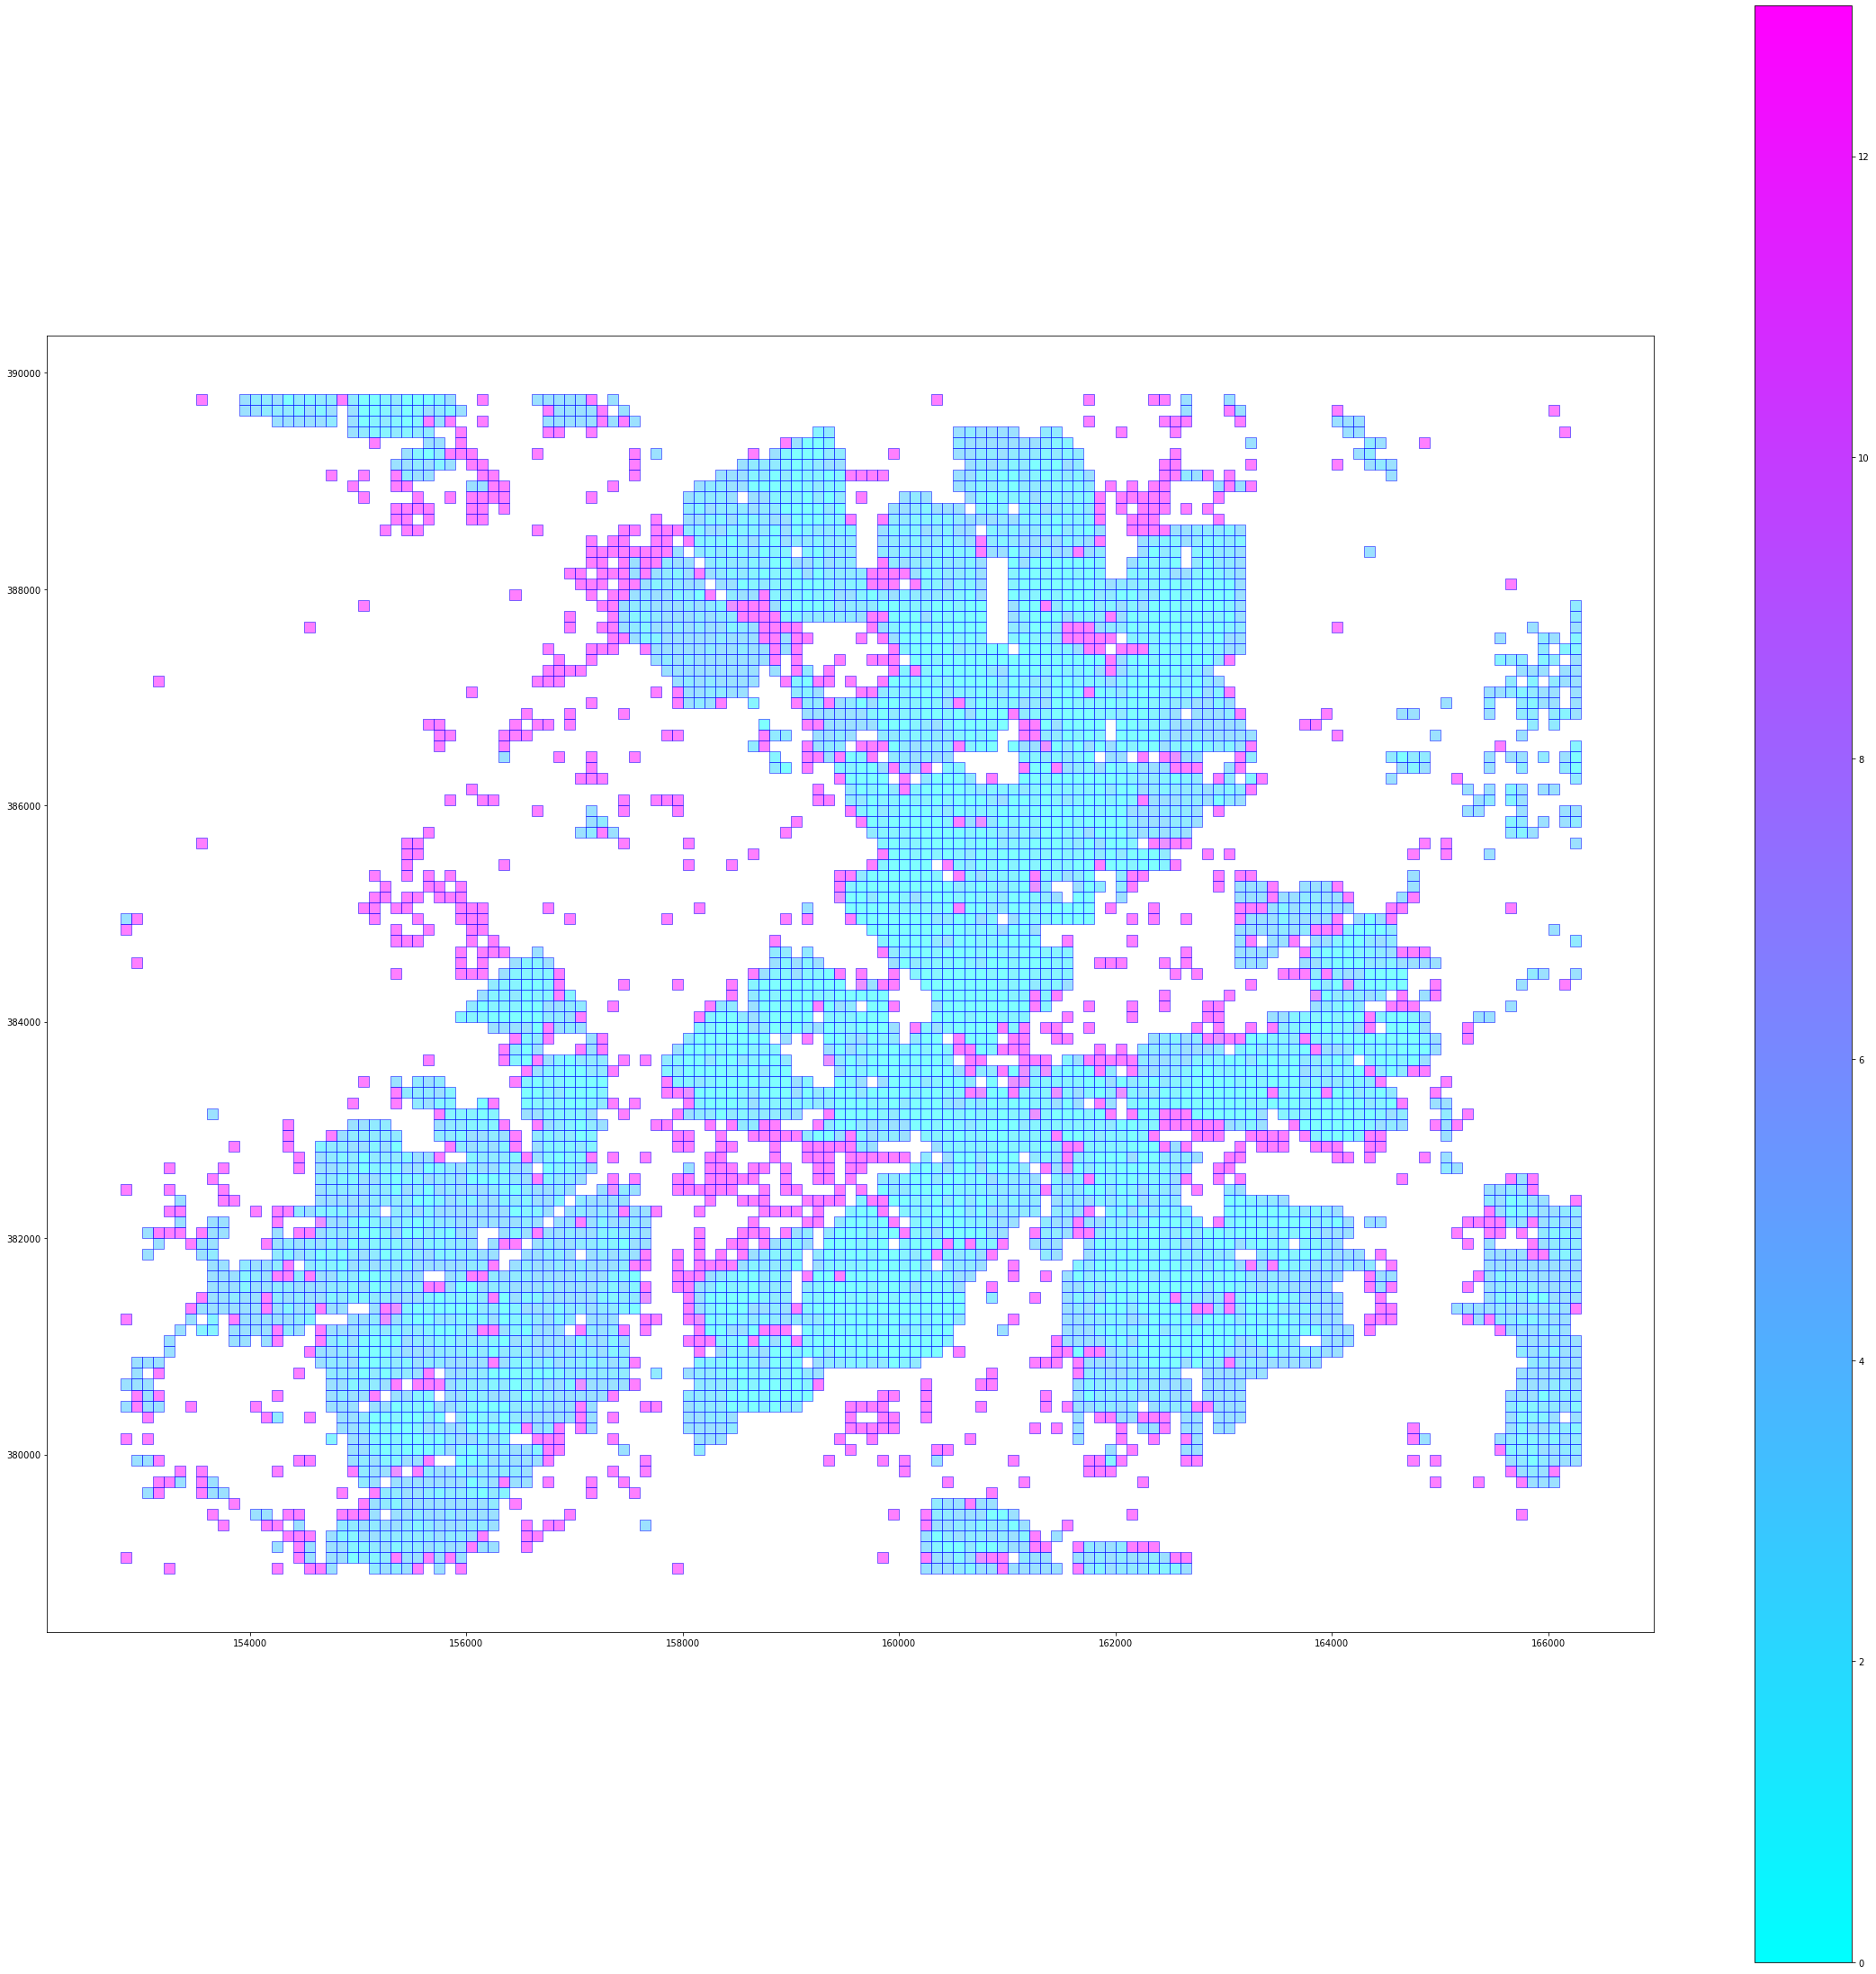

In [142]:
visualize_NANs(bebouwd)

(array([2520., 1068., 1438.,    0.,    0.,    0.,    0.,    0.,   31.,
        1177.]),
 array([ 0. ,  1.3,  2.6,  3.9,  5.2,  6.5,  7.8,  9.1, 10.4, 11.7, 13. ]),
 <BarContainer object of 10 artists>)

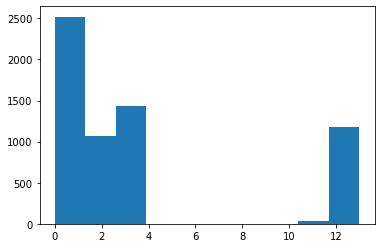

In [145]:
plt.hist(bebouwd.n_missing)

## wipe out rows with #NA >10

NotImplementedError: fillna currently only supports filling with a scalar geometry

In [ ]:
for index, row in bebouwd.iterrows():  
    neighbors = df[df.geometry.touches(row['geometry'])].name.tolist() 
    neighbors = neighbors.remove(row.name)
    df.at[index, "my_neighbors"] = ", ".join(neighbors)

In [143]:
bebouwd["n_missing"] = bebouwd.isna().sum(axis=1)

C:\Users\Gebruiker\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
